In [1]:
# Soal C. Agregasi & Transformasi

# 14.	Kelompokkan data berdasarkan tahun dan hitung total jumlah_penderita_dm per tahun di Jawa Barat.

import pandas as pd

df = pd.read_csv("diabetes.csv")
df_jabar = df[df["nama_provinsi"] == "JAWA BARAT"] # .str.strip().str.lower()
total_per_tahun = df_jabar.groupby("tahun")["jumlah_penderita_dm"].sum().reset_index()

print(total_per_tahun)

   tahun  jumlah_penderita_dm
0   2019               848455
1   2020              1078857
2   2021               925675
3   2022               644704
4   2023               645390
5   2024               668220


In [6]:
# 15.	Kelompokkan data berdasarkan nama_kabupaten_kota dan hitung rata-rata jumlah_penderita_dm tiap kabupaten/kota 
# (jika terdapat lebih dari satu tahun).

import pandas as pd

df = pd.read_csv("diabetes.csv")
kelompok = df.groupby("nama_kabupaten_kota")["jumlah_penderita_dm"]
print("hh",kelompok)
# Hitung jumlah tahun tersedia per kabupaten
tahun_per_kab = df.groupby("nama_kabupaten_kota")["tahun"].nunique()
# print("Unique",tahun_per_kab)
# Ambil kabupaten dengan data lebih dari 1 tahun
kab_multiple_years = tahun_per_kab[tahun_per_kab > 1].index
# Hitung rata-rata jumlah_penderita_dm untuk kabupaten yang memiliki data >1 tahun
avg_dm_per_kab = kelompok.mean()[kab_multiple_years].sort_values(ascending=False).reset_index()

print("Rata-rata jumlah_penderita_dm tiap kabupaten/kota\n",avg_dm_per_kab)

hh <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000022667AE3AC0>
Rata-rata jumlah_penderita_dm tiap kabupaten/kota
         nama_kabupaten_kota  jumlah_penderita_dm
0        KABUPATEN KARAWANG         92411.000000
1          KABUPATEN BEKASI         81174.333333
2           KABUPATEN BOGOR         64286.500000
3         KABUPATEN BANDUNG         51652.666667
4                KOTA DEPOK         46105.000000
5               KOTA BEKASI         45769.000000
6        KABUPATEN SUKABUMI         45277.500000
7              KOTA BANDUNG         43480.166667
8          KABUPATEN CIAMIS         38304.000000
9        KABUPATEN SUMEDANG         34894.000000
10      KABUPATEN INDRAMAYU         33056.666667
11         KABUPATEN SUBANG         24120.166667
12       KABUPATEN KUNINGAN         21259.333333
13          KABUPATEN GARUT         20789.833333
14        KABUPATEN CIREBON         20553.333333
15    KABUPATEN TASIKMALAYA         18176.333333
16               KOTA BOGOR         1732

In [25]:
# 16.	Tentukan kabupaten/kota dengan total jumlah_penderita_dm tertinggi dan terendah di seluruh tahun.

import pandas as pd

df = pd.read_csv("diabetes.csv")

total_dm_per_kab = df.groupby("nama_kabupaten_kota")["jumlah_penderita_dm"].sum()
# print(total_dm_per_kab)
# mengambil kabupaten/kota dengan total jumlah_penderita_dm tertinggi
kab_tertinggi = total_dm_per_kab.idxmax()
nilai_tertinggi = total_dm_per_kab.max()
# kabupaten/kota dengan total jumlah_penderita_dm terendah
kab_terendah = total_dm_per_kab.idxmin()
nilai_terendah = total_dm_per_kab.min()

print(f"Kabupaten/Kota dengan total jumlah_penderita_dm tertinggi : {kab_tertinggi} {nilai_tertinggi}")
print(f"Kabupaten/Kota dengan total jumlah_penderita_dm terendah : {kab_terendah} {nilai_terendah}")

Kabupaten/Kota dengan total jumlah_penderita_dm tertinggi : KABUPATEN KARAWANG 554466
Kabupaten/Kota dengan total jumlah_penderita_dm terendah : KOTA BANJAR 21664


In [8]:
# 17.	Buat kolom baru bernama kategori_dm dengan aturan berbasis jumlah_penderita_dm:
# o	< 50.000 → "Rendah"
# o	50.000–99.999 → "Sedang"
# o	>= 100.000 → "Tinggi"

import pandas as pd

df = pd.read_csv("diabetes.csv")

# kolom kategori_dm
df["kategori_dm"] = pd.cut(
    df["jumlah_penderita_dm"],
    bins=[-1, 49999, 99999, float("inf")],  # batas
    labels=["Rendah", "Sedang", "Tinggi"]
)
top10 = df[["nama_kabupaten_kota", "jumlah_penderita_dm", "kategori_dm"]].head(10)
# Tampilkan 10 baris pertama untuk cek
print(top10)

     nama_kabupaten_kota  jumlah_penderita_dm kategori_dm
0        KABUPATEN BOGOR                57769      Sedang
1     KABUPATEN SUKABUMI               148447      Tinggi
2      KABUPATEN CIANJUR                12100      Rendah
3      KABUPATEN BANDUNG                45412      Rendah
4        KABUPATEN GARUT                    0      Rendah
5  KABUPATEN TASIKMALAYA                10930      Rendah
6       KABUPATEN CIAMIS                69113      Sedang
7     KABUPATEN KUNINGAN                31582      Rendah
8      KABUPATEN CIREBON                21981      Rendah
9   KABUPATEN MAJALENGKA                12915      Rendah


In [ ]:
# 18.	Untuk setiap tahun, hitung persentase jumlah penderita DM per kabupaten/kota terhadap total jumlah penderita DM di tahun tersebut, 
# lalu simpan dalam kolom baru bernama persentase_tahun.
# df["jumlah_penderita_dm"] = pd.to_numeric(df["jumlah_penderita_dm"], errors="coerce")

import pandas as pd

df = pd.read_csv("diabetes.csv")
# Hitung persentase per tahun
df["persentase_tahun"] = df.groupby("tahun")["jumlah_penderita_dm"].transform(
    lambda x: (x / x.sum()) * 100
)
# print(df)
top10 = df[["tahun", "nama_kabupaten_kota", "jumlah_penderita_dm", "persentase_tahun"]].head(10)

# Tampilkan 10 baris pertama untuk cek
print(top10)

   tahun    nama_kabupaten_kota  jumlah_penderita_dm  persentase_tahun
0   2019        KABUPATEN BOGOR                57769          6.808729
1   2019     KABUPATEN SUKABUMI               148447         17.496155
2   2019      KABUPATEN CIANJUR                12100          1.426122
3   2019      KABUPATEN BANDUNG                45412          5.352317
4   2019        KABUPATEN GARUT                    0          0.000000
5   2019  KABUPATEN TASIKMALAYA                10930          1.288224
6   2019       KABUPATEN CIAMIS                69113          8.145747
7   2019     KABUPATEN KUNINGAN                31582          3.722295
8   2019      KABUPATEN CIREBON                21981          2.590709
9   2019   KABUPATEN MAJALENGKA                12915          1.522179


In [ ]:
# 19.	Buat tabel ringkas (misalnya menggunakan groupby) yang menunjukkan:
# tahun, total_jumlah_penderita_dm, dan jumlah_kabupaten_kota yang datanya tercatat di tahun tersebut.

import pandas as pd

df = pd.read_csv("diabetes.csv")
# Pastikan kolom numeric
# Buat tabel ringkas per tahun
tabel_ringkas = df.groupby("tahun").agg(
    total_jumlah_penderita_dm = ("jumlah_penderita_dm", "sum"),
    jumlah_kabupaten_kota = ("nama_kabupaten_kota", "nunique")
).reset_index()

# Tampilkan tabel
print(tabel_ringkas)

   tahun  total_jumlah_penderita_dm  jumlah_kabupaten_kota
0   2019                     848455                     27
1   2020                    1078857                     27
2   2021                     925675                     27
3   2022                     644704                     27
4   2023                     645390                     27
5   2024                     668220                     27


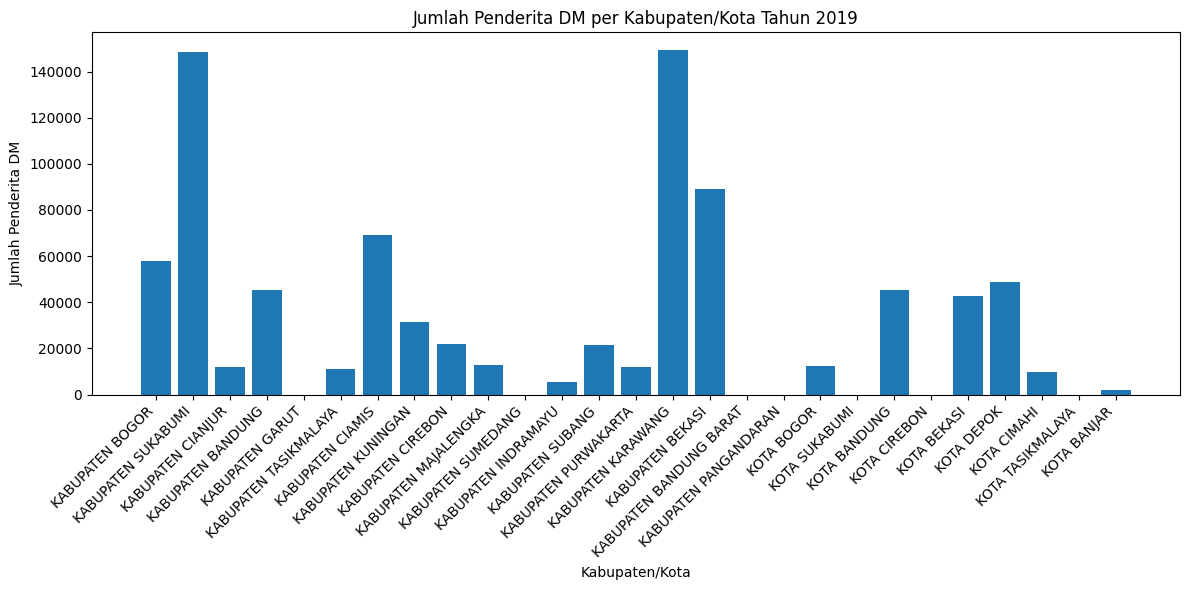

In [32]:
# 20.	Buat grafik bar yang menampilkan jumlah_penderita_dm untuk setiap kabupaten/kota pada tahun 2019.
# o	Sumbu-x: nama_kabupaten_kota
# o	Sumbu-y: jumlah_penderita_dm
# o	Beri judul dan label sumbu yang jelas.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")

df_2019 = df[df["tahun"] == 2019]
# Plot bar
plt.figure(figsize=(12, 6))
plt.bar(df_2019["nama_kabupaten_kota"], df_2019["jumlah_penderita_dm"])
# Label dan judul
plt.title("Jumlah Penderita DM per Kabupaten/Kota Tahun 2019")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Jumlah Penderita DM")
# Supaya tulisan x-axis tidak bertumpuk
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


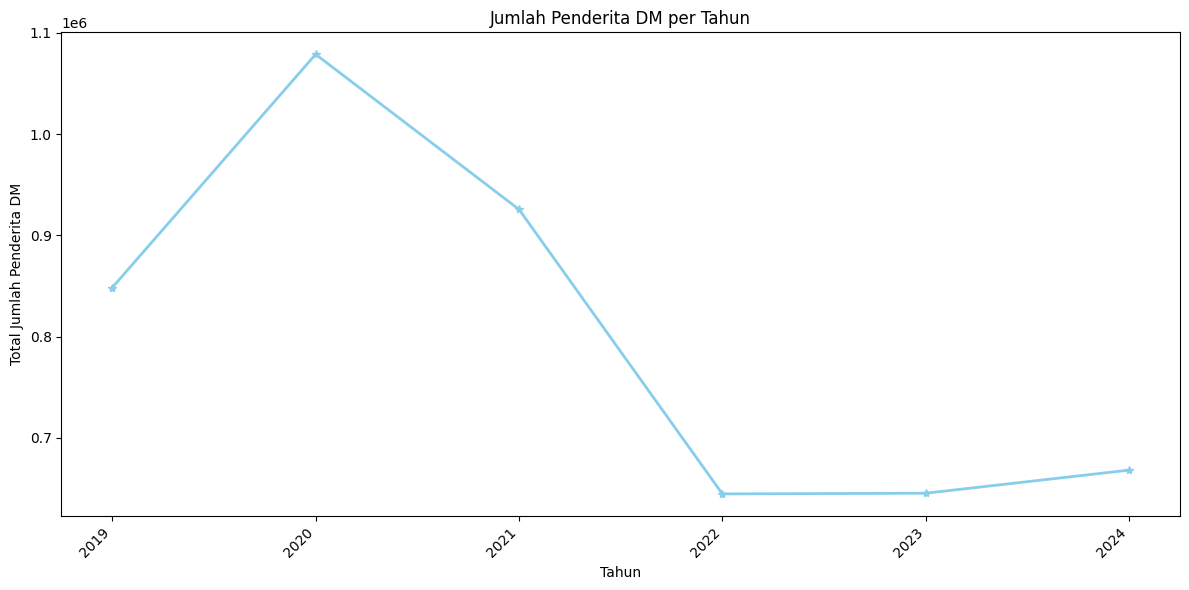

In [49]:
# 21.	Buat grafik garis (line chart) yang menampilkan total jumlah penderita DM Jawa Barat per tahun.
# o	Sumbu-x: tahun
# o	Sumbu-y: total jumlah_penderita_dm
# o	Tambahkan titik data (marker) di setiap tahun.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
total_per_tahun = df.groupby("tahun")["jumlah_penderita_dm"].sum().reset_index()
# Plot bar
plt.figure(figsize=(12, 6))
plt.plot(total_per_tahun["tahun"], total_per_tahun["jumlah_penderita_dm"], 
         marker='*', linewidth=2, color = 'skyblue')
# Label dan judul
plt.title("Jumlah Penderita DM per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Total Jumlah Penderita DM")
# Supaya tulisan x-axis tidak bertumpuk
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

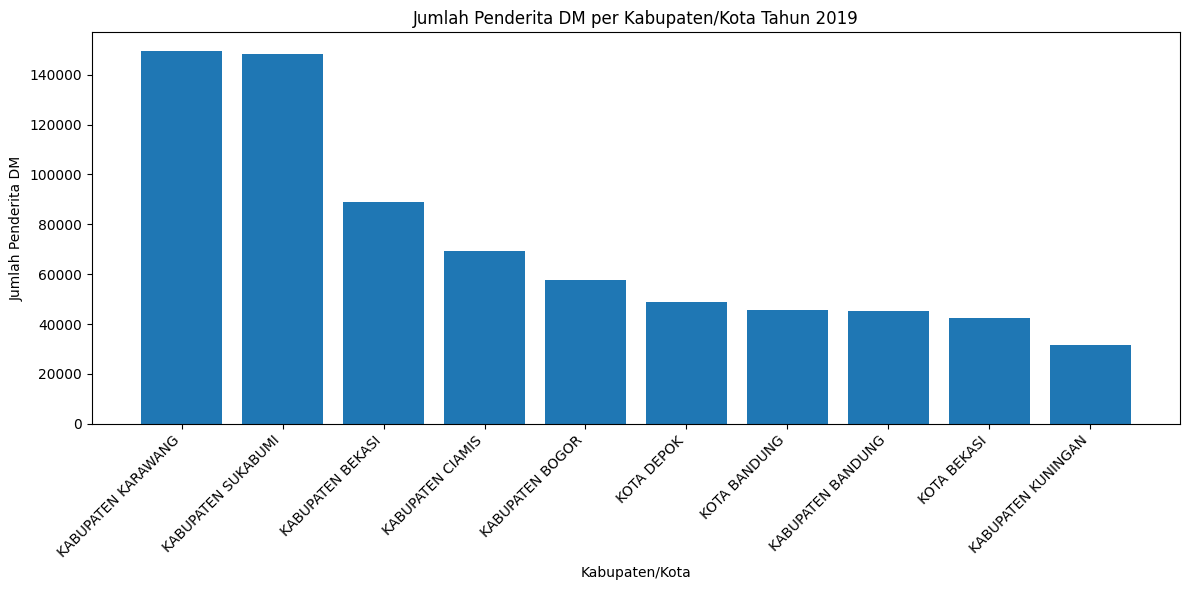

In [55]:
# 22.	Buat grafik bar horizontal untuk menampilkan 10 kabupaten/kota dengan jumlah_penderita_dm tertinggi pada tahun 2019.
# o	Urutkan dari jumlah tertinggi ke terendah.

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df_2019 = df[df["tahun"] == 2019]
top5 = df_2019.nlargest(10, 'jumlah_penderita_dm')
# Plot bar
plt.figure(figsize=(12, 6))
plt.bar(top5["nama_kabupaten_kota"], top5["jumlah_penderita_dm"])
# Label dan judul
plt.title("Jumlah Penderita DM per Kabupaten/Kota Tahun 2019")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Jumlah Penderita DM")
# Supaya tulisan x-axis tidak bertumpuk
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

C:\Users\Daniel\AppData\Local\Temp\ipykernel_7936\3693873103.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  kategori_dm_2019 = df_2019.groupby("kategori_dm")["jumlah_penderita_dm"].sum()


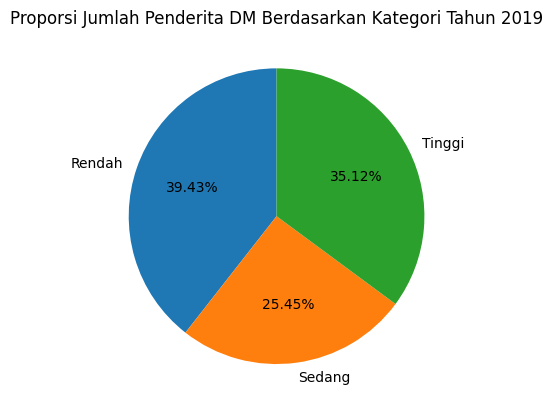

In [ ]:
# 23.	Buat pie chart yang menunjukkan proporsi jumlah_penderita_dm berdasarkan kategori_dm ("Rendah", "Sedang", "Tinggi") pada tahun 2019.
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df["kategori_dm"] = pd.cut(
    df["jumlah_penderita_dm"],
    bins=[-1, 49999, 99999, float("inf")],  
    labels=["Rendah", "Sedang", "Tinggi"]
)
df_2019 = df[df["tahun"] == 2019]
kategori_dm_2019 = df_2019.groupby("kategori_dm")["jumlah_penderita_dm"].sum()
# print(kategori_dm_2019)

# Buat pie chart
plt.figure()
plt.pie(
    kategori_dm_2019,
    labels=kategori_dm_2019.index,
    autopct="%1.2f%%",
    startangle=90
)
# (nilai kategori / total semua kategori) × 100
plt.title("Proporsi Jumlah Penderita DM Berdasarkan Kategori Tahun 2019")
plt.show()


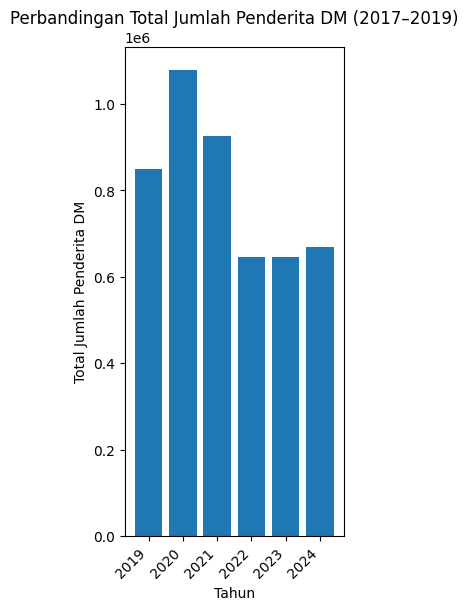

In [2]:
# 24.	Buat grafik bar yang membandingkan total jumlah_penderita_dm di tiga tahun terakhir yang tersedia (misal: 2017, 2018, 2019 jika ada di dataset).

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")

df_periode = df[
    (df["tahun"] >= 2017) &
    (df["tahun"] <= 2024) &
    (df["nama_provinsi"] == "JAWA BARAT")
]
total_per_tahun = df_periode.groupby("tahun")["jumlah_penderita_dm"].sum().reset_index()
# Plot bar chart
plt.figure(figsize=(3,6))
plt.bar(total_per_tahun["tahun"].astype(str), # agar matloplib tidak berpikir ini diskrit
        total_per_tahun["jumlah_penderita_dm"])
# Judul dan label
plt.title("Perbandingan Total Jumlah Penderita DM (2017–2019)")
plt.xlabel("Tahun")
plt.ylabel("Total Jumlah Penderita DM")
# Agar tahun terlihat jelas
# plt.xticks(total_per_tahun["tahun"])
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()



25.	Berdasarkan grafik-grafik yang kamu buat pada soal 20–24, tuliskan analisis tertulis yang menjawab pertanyaan berikut:
a. Kabupaten/kota mana yang paling tinggi jumlah penderita DM-nya? Apakah konsisten di beberapa tahun?
b. Apakah secara umum jumlah penderita DM di Jawa Barat cenderung naik, turun, atau stabil dari tahun ke tahun?
c. Bagaimana sebaran kategori Rendah/Sedang/Tinggi? Lebih banyak kabupaten di kategori mana?

Setelah kami analisis Kabupaten/Kota yang paling tinggi jumlah penderita DM-nya adalah Kabupaten Bekasi, dari tahun 2019-2024 Kabupaten Bekasi selalu termasuk dalam Top 10 Kabupaten/kota penderita dm di Jawa barat. Jumlah penderita DM di Jawa Barat  cenderung naik dari tahun 2019-2020 jumlah penderita dm meningkat 

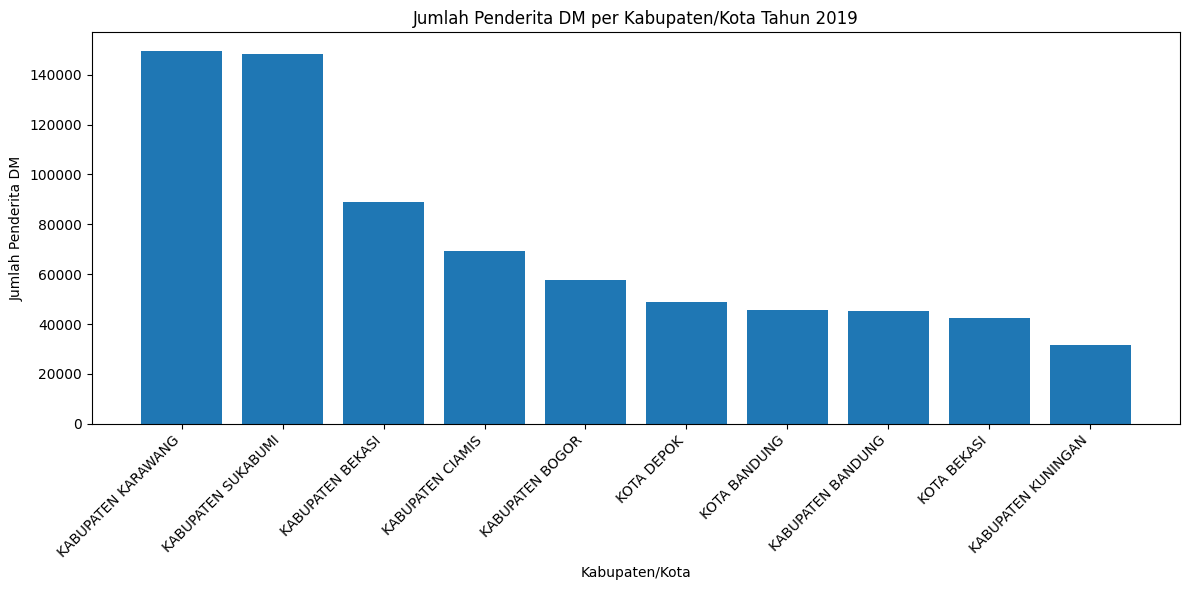

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df_2019 = df[df["tahun"] == 2019]
# print(df_2019)
top10 = df_2019.nlargest(10, 'jumlah_penderita_dm')
# Plot bar
plt.figure(figsize=(12, 6))
plt.bar(top10["nama_kabupaten_kota"], top10["jumlah_penderita_dm"])
# Label dan judul
plt.title("Jumlah Penderita DM per Kabupaten/Kota Tahun 2019")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Jumlah Penderita DM")
# Supaya tulisan x-axis tidak bertumpuk
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("projek-flusk/static/1.png")
plt.show()

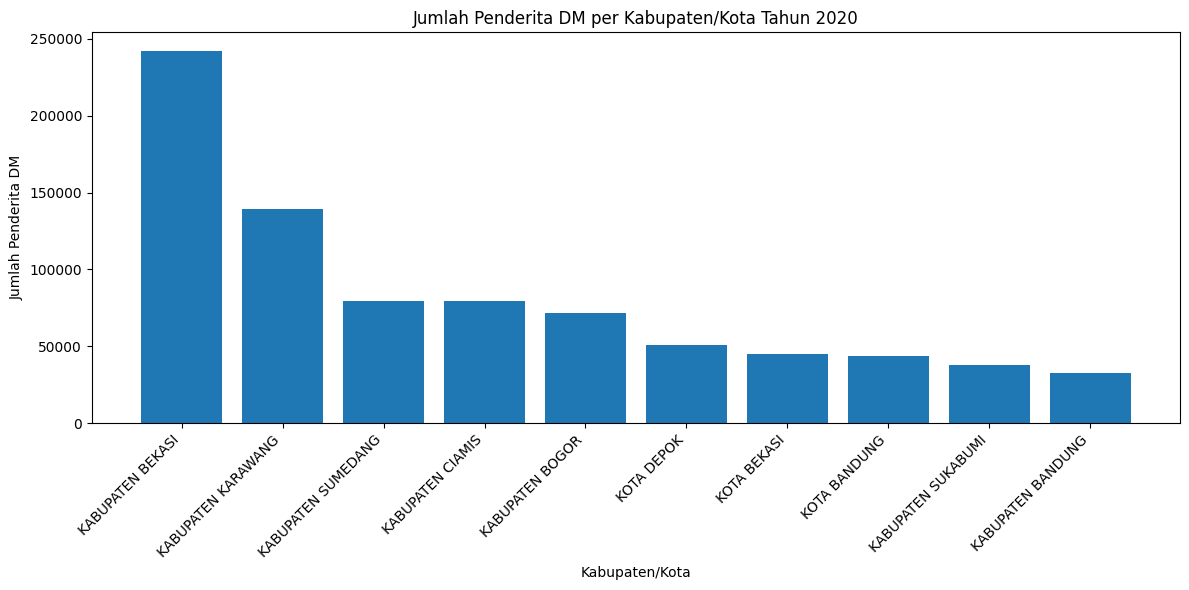

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df_2019 = df[df["tahun"] == 2020]
top5 = df_2019.nlargest(10, 'jumlah_penderita_dm')
# Plot bar
plt.figure(figsize=(12, 6))
plt.bar(top5["nama_kabupaten_kota"], top5["jumlah_penderita_dm"])
# Label dan judul
plt.title("Jumlah Penderita DM per Kabupaten/Kota Tahun 2020")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Jumlah Penderita DM")
# Supaya tulisan x-axis tidak bertumpuk
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("projek-flusk/static/2.png")
plt.show()

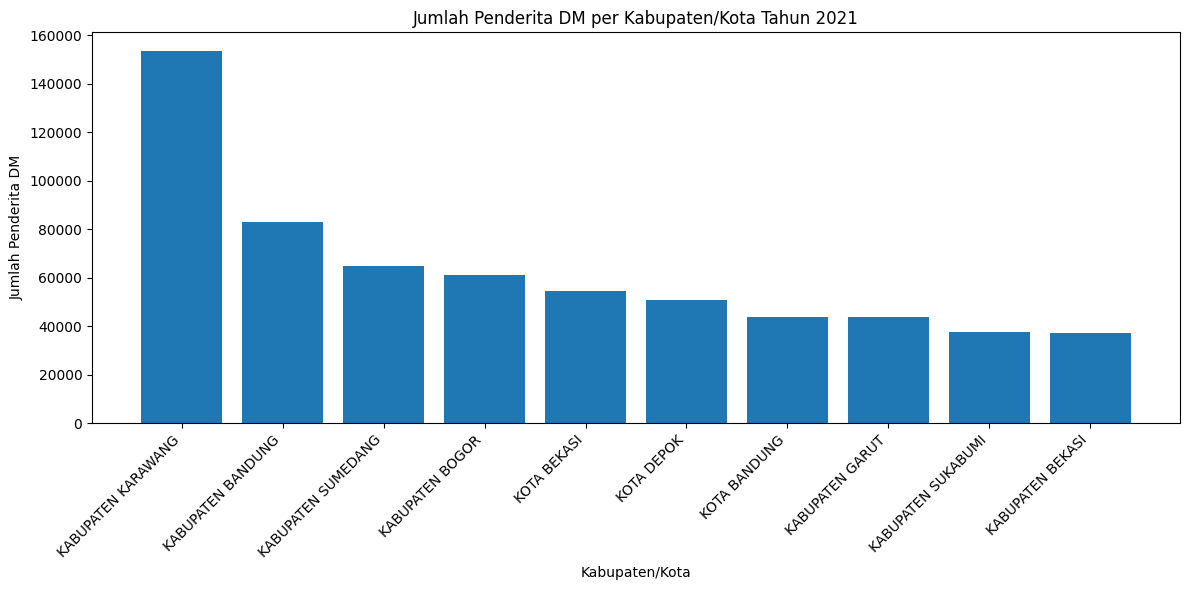

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df_2019 = df[df["tahun"] == 2021]
top5 = df_2019.nlargest(10, 'jumlah_penderita_dm')
# Plot bar
plt.figure(figsize=(12, 6))
plt.bar(top5["nama_kabupaten_kota"], top5["jumlah_penderita_dm"])
# Label dan judul
plt.title("Jumlah Penderita DM per Kabupaten/Kota Tahun 2021")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Jumlah Penderita DM")
# Supaya tulisan x-axis tidak bertumpuk
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("projek-flusk/static/3.png")
plt.show()

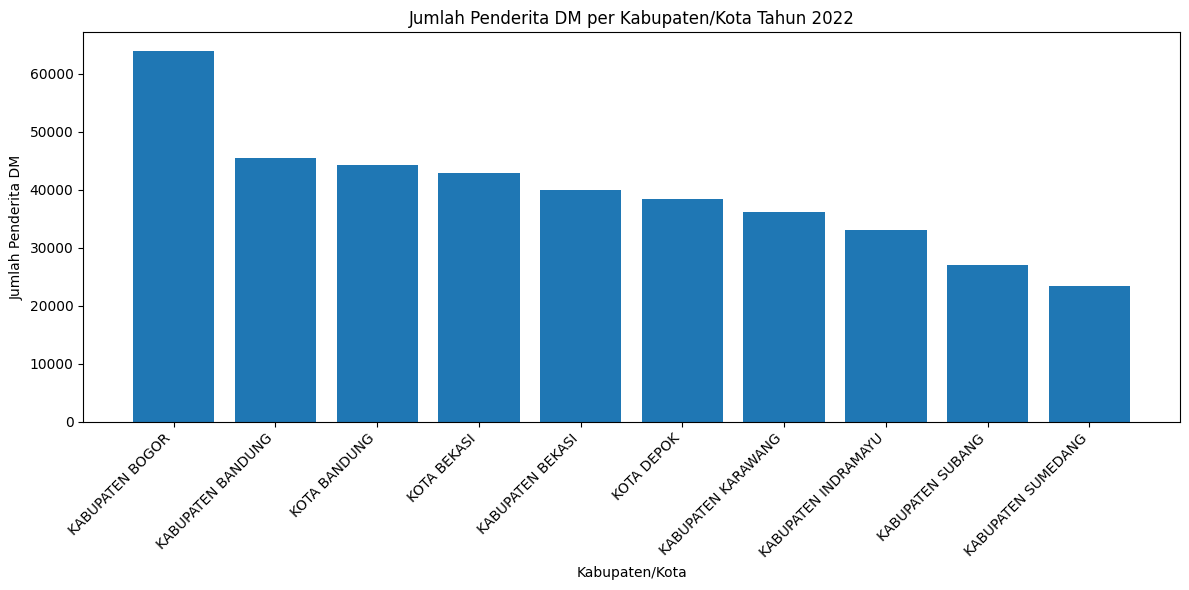

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df_2019 = df[df["tahun"] == 2022]
top5 = df_2019.nlargest(10, 'jumlah_penderita_dm')
# Plot bar
plt.figure(figsize=(12, 6))
plt.bar(top5["nama_kabupaten_kota"], top5["jumlah_penderita_dm"])
# Label dan judul
plt.title("Jumlah Penderita DM per Kabupaten/Kota Tahun 2022")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Jumlah Penderita DM")
# Supaya tulisan x-axis tidak bertumpuk
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("projek-flusk/static/4.png")
plt.show()

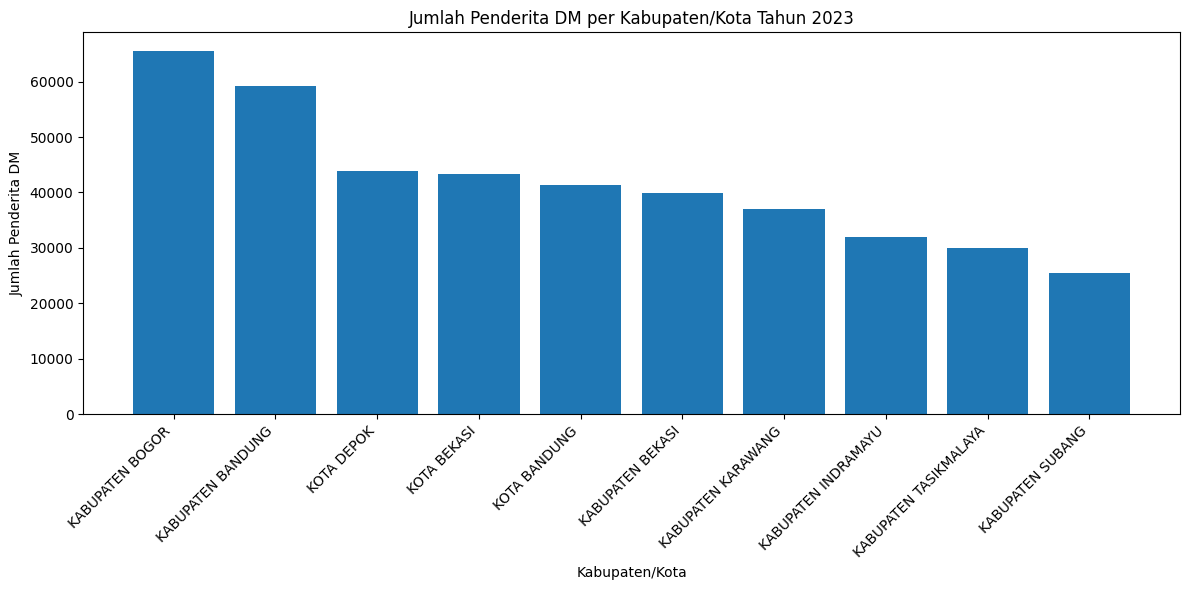

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df_2019 = df[df["tahun"] == 2023]
top5 = df_2019.nlargest(10, 'jumlah_penderita_dm')
# Plot bar
plt.figure(figsize=(12, 6))
plt.bar(top5["nama_kabupaten_kota"], top5["jumlah_penderita_dm"])
# Label dan judul
plt.title("Jumlah Penderita DM per Kabupaten/Kota Tahun 2023")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Jumlah Penderita DM")
# Supaya tulisan x-axis tidak bertumpuk
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("projek-flusk/static/5.png")
plt.show()

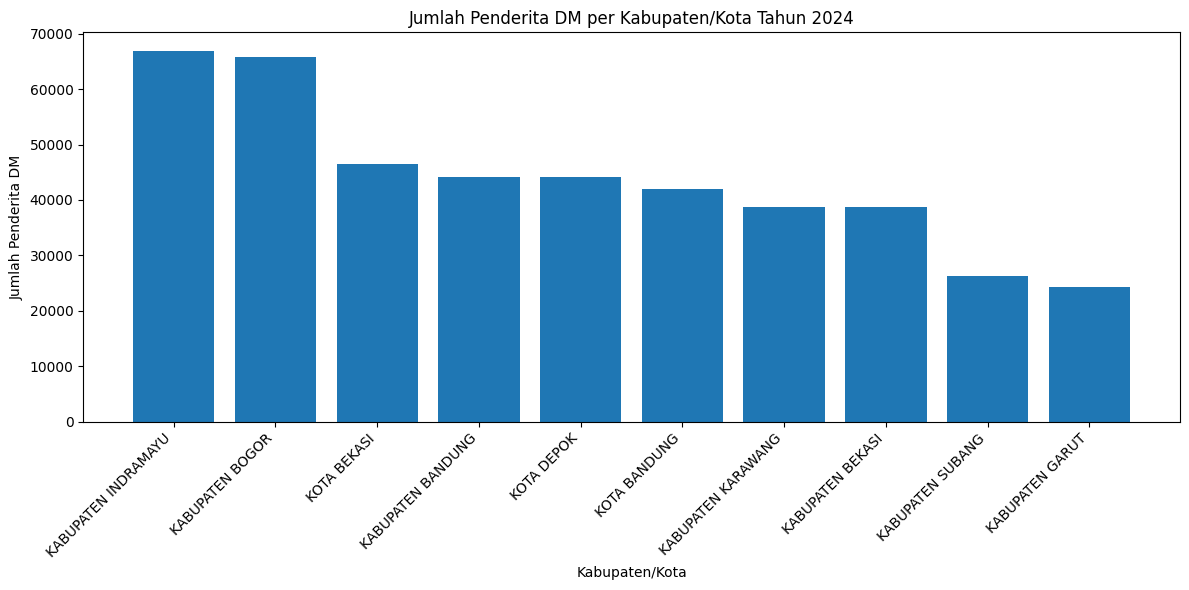

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")
df_2019 = df[df["tahun"] == 2024]
top5 = df_2019.nlargest(10, 'jumlah_penderita_dm')
# Plot bar
plt.figure(figsize=(12, 6))
plt.bar(top5["nama_kabupaten_kota"], top5["jumlah_penderita_dm"])
# Label dan judul
plt.title("Jumlah Penderita DM per Kabupaten/Kota Tahun 2024")
plt.xlabel("Kabupaten/Kota")
plt.ylabel("Jumlah Penderita DM")
# Supaya tulisan x-axis tidak bertumpuk
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("projek-flusk/static/6.png")
plt.show()

In [ ]:
nilai_pretest = 0
waktu_jawab = 0
jumlah_salah = 0

if nilai_pretest ≤ 60 and jumlah_salah ≥ 4
    level_kemampuan = "Rendah"

if nilai_pretest > 80 and waktu_jawab < 60
THEN level_kemampuan = "Tinggi"                                            # type: ignore


In [ ]:
jumlah_salah = 0
nilai_pretest = 0

if nilai_pretest <= 60 and jumlah_salah <= 4                                                  
    level_kemampuan = "Rendah"
if nilai_pretest >= 60 and nilai_pretest <= 80 and jumlah_salah <= 4                                                  
    level_kemampuan = "Sedang"                                                                  
if nilai_pretest > 80 and waktu_jawab < 60:
    level_kemampuan = "Tinggi"                                                                
